---
# Pilot SRF

This notebook describes the first attempt with the hole-response experiment. The pipeline starts of after [call_lsprep](https://github.com/gjheij/linescanning/blob/main/bin/call_lsprep), which creates an `h5`-file with all relevant dataframes

In [1]:
from linescanning import (
    utils,
    dataset,
    fitting,
    plotting,
    glm,
    pycortex
)
import itertools
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import os
opj = os.path.join

## Data loader

In [2]:
deriv = "/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives"
subject = "sub-008"
# ribbon = (357,366)

# get h5-file
data_file = opj(deriv, "lsprep", subject, f"{subject}_ses-2_desc-preproc_bold.h5")

# load in
obj_ = dataset.Dataset(
    data_file,
    verbose=True
)

df_onsets = obj_.fetch_onsets()
df_func = obj_.fetch_fmri()

DATASET
Reading from /data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/lsprep/sub-008/sub-008_ses-2_desc-preproc_bold.h5
 Set attribute: df_blinks
 Set attribute: df_func_ica
 Set attribute: df_func_psc
 Set attribute: df_func_raw
 Set attribute: df_onsets
 Could not set attribute 'df_saccades'
 Set attribute: df_space_eye
 Set attribute: df_space_func

DATASET: created
Fetching dataframe from attribute 'df_func_psc'


In [27]:
run_ids = obj_.get_runs(df_func)
ribbon = (357,366)
# df_rib = utils.select_from_df(df_func, expression="ribbon", indices=ribbon)
srfa = utils.select_from_df(df_func, expression="task = SRFa")
srfa

vox 0      vox 1      vox 2      vox 3  \
subject task run t                                                     
008     SRFa 1   0.000   -25.561066  19.269653 -26.095978   6.984993   
                 0.105   -10.537170 -39.561531  15.990334   7.038963   
                 0.210    -1.148537  -1.430168  44.669800  46.421997   
                 0.315     7.228592 -33.536381  15.791832  48.999435   
                 0.420    14.908943 -20.563850 -34.971165   6.157341   
...                             ...        ...        ...        ...   
             3   335.475  11.690804   0.971344  -4.587059 -17.393501   
                 335.580  23.339783 -30.382477  -6.232178 -29.828697   
                 335.685  55.232491 -20.416763  30.410431 -31.269012   
                 335.790   4.410049  -2.666229 -21.558563 -32.613998   
                 335.895 -45.349270  -3.931282 -29.319191  -9.652382   

                              vox 4      vox 5      vox 6      vox 7  \
subject task run t                                                     
008     SRFa 1   0.000   -12.945633  22.581444 -51.179150 -35.605972   
                 0.105    -5.963631 -15.166534  31.646515 -14.423325   
                 0.210   -29.076233   4.184837  -6.655823  44.125473   
                 0.315   -10.701096  16.143921   0.592567  14.462303   
                 0.420   -24.112587 -26.326019  39.795441  17.797302   
...                             ...        ...        ...        ...   
             3   335.475  -7.282112  19.545464  18.108513  -7.817749   
                 335.580  27.504639  71.123917   4.164673  16.767334   
                 335.685   8.845200  16.883125 -16.916153 -48.318863   
                 335.790   8.733917  18.015419 -51.499737  -6.157356   
                 335.895 -30.511124  -9.472145  56.052841  20.496902   

                              vox 8      vox 9  ...    vox 710    vox 711  \
subject task run t                              ...                         
008     SRFa 1   0.000   -16.635544   3.851830  ...   2.516029  -1.918938   
                 0.105    27.772644  21.831062  ...  -8.728821  -3.758476   
                 0.210   -37.800919 -25.522781  ... -18.795692  -2.799301   
                 0.315   -25.666077   6.131241  ...  -0.270981  24.644119   
                 0.420    19.271507   5.617188  ...  30.632828 -31.541672   
...                             ...        ...  ...        ...        ...   
             3   335.475  -7.434059   2.451469  ... -34.699081  -5.839439   
                 335.580 -31.003349 -33.785275  ...  -5.474892  -5.267418   
                 335.685  12.796059  30.604355  ... -10.233757  47.414322   
                 335.790   7.602928   3.727402  ... -31.345177 -43.766647   
                 335.895  47.250877   6.253593  ...  19.861641  86.829208   

                            vox 712    vox 713    vox 714    vox 715  \
subject task run t                                                     
008     SRFa 1   0.000     1.781769  26.130508  39.279457 -17.010094   
                 0.105    26.517792 -11.588486 -20.618370  30.254791   
                 0.210     3.191696 -12.622124   4.406456  28.658737   
                 0.315     7.106735  30.877518 -18.151199 -13.515511   
                 0.420   -14.512268 -24.973412   6.247047  22.576775   
...                             ...        ...        ...        ...   
             3   335.475 -26.036240  22.021690 -61.125858  49.023651   
                 335.580  -3.082794 -53.533543 -33.812599 -38.118355   
                 335.685   2.000221  -1.912529   5.481163 -25.597244   
                 335.790   1.042068  -8.666214 -44.697826  13.608994   
                 335.895 -42.661819 -36.084457  68.825150 -24.515160   

                            vox 716    vox 717    vox 718    vox 719  
subject task run t                                                    
008     SRFa 1   0.000   -20.748863  -1.496010  23.107407   0.209366  
    

comparing run ('1', '2')
comparing run ('1', '3')
comparing run ('2', '3')


Text(0.5, 0.9, 'cross-correlation')

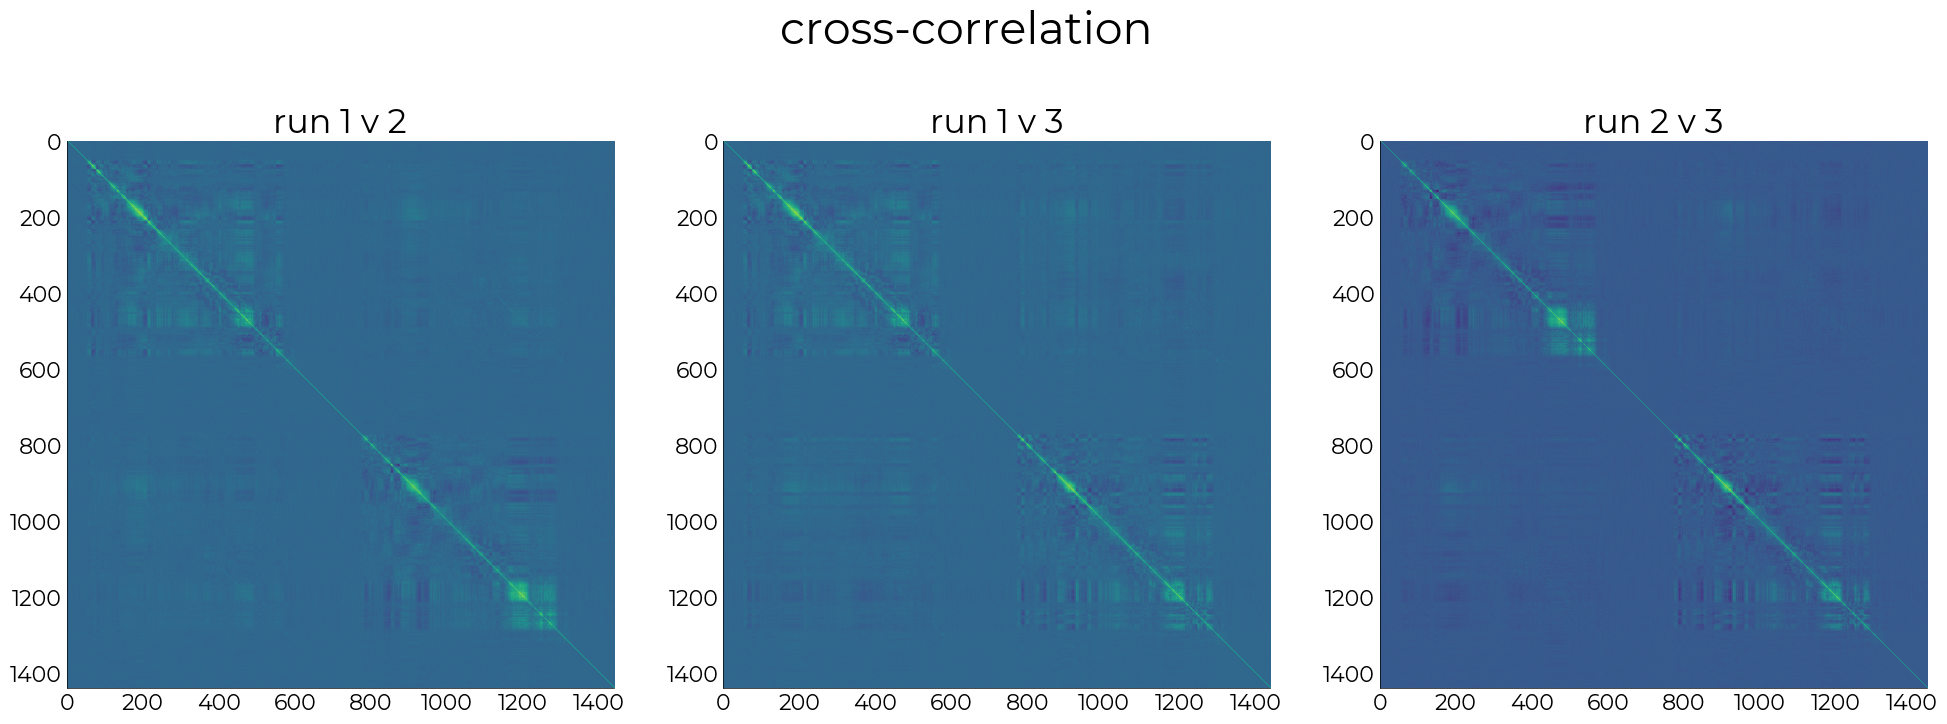

In [28]:
%matplotlib inline
fig,axs = plt.subplots(ncols=len(run_ids), figsize=(24,10))
comb = list(itertools.combinations(run_ids, 2))
for ix,c in enumerate(comb):
    print(f"comparing run {c}")
    arr1 = utils.select_from_df(srfa, expression=f"run = {c[0]}").values.T
    arr2 = utils.select_from_df(srfa, expression=f"run = {c[1]}").values.T

    # corr = signal.correlate2d(
    #     arr1,
    #     arr2, 
    #     boundary='symm', 
    #     mode='same')

    corr = np.corrcoef(arr1,arr2)
    axs[ix].imshow(corr) #, aspect=1/5)
    axs[ix].set_title(f"run {c[0]} v {c[1]}")
    plotting.conform_ax_to_obj(axs[ix], label_size=16, font_size=24)

fig.suptitle("cross-correlation", fontsize=32, y=0.9)

In [4]:
# average across runs within tasks
df_avg = df_func.groupby(["subject","task","t"]).mean()
df_avg

vox 0      vox 1      vox 2      vox 3      vox 4  \
subject task t                                                                
008     SRFa 0.000    -0.072243  10.757678  -4.229917  -7.617972 -22.183029   
             0.105     4.534716  17.207062  -3.101501  20.129179 -14.890283   
             0.210     8.699162   6.364235   9.320292  20.572077  -3.641459   
             0.315    16.912241   8.118379  -5.824725  28.068029 -13.411397   
             0.420     4.853348 -27.244730   0.504144  12.383107   0.785624   
...                         ...        ...        ...        ...        ...   
        SRFb 335.475  11.934085  22.812483   9.368197   8.480537   6.090597   
             335.580  34.335537  19.658188   9.377261   1.604729 -11.975560   
             335.685  -1.365507   1.843567  -6.528628   7.143321   5.231407   
             335.790  -7.586098  37.883759  -9.351207   8.920491 -17.287945   
             335.895 -10.964752  -8.492004 -14.534513  -5.248347 -10.664060   

                          vox 5      vox 6      vox 7      vox 8      vox 9  \
subject task t                                                                
008     SRFa 0.000     5.848160   6.635553  -1.089747   4.087618  -8.388580   
             0.105    -0.374657  -6.328964 -15.977620   1.733744   3.434466   
             0.210    12.148549   1.464010   6.654897 -21.806717 -14.704132   
             0.315    -9.257034   0.965912   7.172997 -31.941675  16.121496   
             0.420     9.205150  29.222845   8.034081   8.960960  12.764717   
...                         ...        ...        ...        ...        ...   
        SRFb 335.475   3.728210 -16.359381   4.209399 -16.641996 -15.617310   
             335.580  -9.933383  11.272244  13.303386   7.885206  21.269836   
             335.685  -6.475713  20.119829  -1.117620   7.678950  -4.243544   
             335.790   5.141775   7.309380 -23.711168  -6.514526  13.705360   
             335.895  -7.258390   3.662552   9.724220  21.437677  12.109360   

                      ...    vox 710    vox 711    vox 712    vox 713  \
subject task t        ...                                               
008     SRFa 0.000    ...   9.758095 -11.172732 -13.549011   7.263880   
             0.105    ...   0.825869 -12.343432   5.037064   5.750799   
             0.210    ... -11.432281  -7.338768  -2.535578  -9.058243   
             0.315    ...   6.336912   2.777423  32.700176   2.908361   
             0.420    ...  33.631920  -5.622983   3.145503 -14.975212   
...                   ...        ...        ...        ...        ...   
        SRFb 335.475  ...  17.178480   0.998751  -4.553385   2.443965   
             335.580  ...   7.272807 -11.232633 -16.341776  -0.878583   
             335.685  ...   6.353139  -6.751528   2.510478 -10.812474   
             335.790  ...   7.525500  -4.378178  13.441200  -0.310565   
             335.895  ...   1.373672   7.262421 -19.412415 -31.298510   

                        vox 714    vox 715    vox 716    vox 717    vox 718  \
subject task t                                                                
008     SRFa 0.000     6.694199  -4.697871 -20.482168  -3.818176   5.480390   
             0.105     1.182182  14.388466  -9.307846  -3.369878  -5.315920   
             0.210   -12.102542  18.623184 -18.764380  11.067601  29.002943   
             0.315   -10.285205  -1.689875  15.966052  -0.452258  11.513515   
             0.420     9.638871   3.966057  15.339249 -21.442963  12.721400   
...                         ...        ...        ...        ...        ...   
        SRFb 335.475  13.682193  -6.226479  -8.911540  -4.095904 -18.211689   
             335.580 -11.596383  22.187212   4.268394 -20.818460  20.312670   
             335.685   6.250135   5.601690 -22.313517 -28.603043  15.695396   
             335.790 -11.005294   9.625069  11.686131   4.663811  18.222193   
             335.895  -3.044263   5.263903  10.794228  -3.414963   4.689

In [22]:
# select ribbon voxels
# ribbon = (346,359)
ribbon = (357,366)
df_ribbon = utils.select_from_df(df_avg, expression="ribbon", indices=ribbon)
df_ribbon

vox 357   vox 358   vox 359   vox 360   vox 361  \
subject task t                                                           
008     SRFa 0.000   -0.517993 -2.410431 -1.045695 -1.085574  0.151843   
             0.105   -1.534927  0.468923 -0.625643 -0.785845 -0.102491   
             0.210   -1.280286  0.025495  0.763962 -0.387230 -1.175789   
             0.315   -1.851804 -0.995338 -0.361417  0.388252  0.291979   
             0.420   -1.604396 -0.211342  0.475980 -1.886762 -1.111196   
...                        ...       ...       ...       ...       ...   
        SRFb 335.475  1.696218  2.256210 -0.665288 -2.230520  0.037758   
             335.580 -0.348811 -1.575686 -0.441462  2.185895 -0.537888   
             335.685 -0.723320  2.003443  0.452944 -0.519903  1.117455   
             335.790  0.784411 -0.599007  1.007245  1.424123 -0.724136   
             335.895  0.337725  1.797259  1.031222  0.813983 -0.057378   

                       vox 362   vox 363   vox 364   vox 365  
subject task t                                                
008     SRFa 0.000    1.825974  1.710955  2.332603  0.601791  
             0.105    2.340797  3.088300  1.400279  2.209880  
             0.210   -0.721860  0.719198 -0.370466 -1.523163  
             0.315    0.968931  0.591006 -0.403414 -2.014915  
             0.420   -1.386002  1.297785 -0.655708 -0.562579  
...                        ...       ...       ...       ...  
        SRFb 335.475 -0.538879  1.218623  1.143519  2.383471  
             335.580  0.321256  0.289032  1.635279 -0.530490  
             335.685  1.306338  1.428083  1.302556  1.176219  
             335.790  1.978264  1.641665  1.898277  1.188120  
             335.895 -0.728610  1.238922  0.007228  1.364507  

[6400 rows x 9 columns]

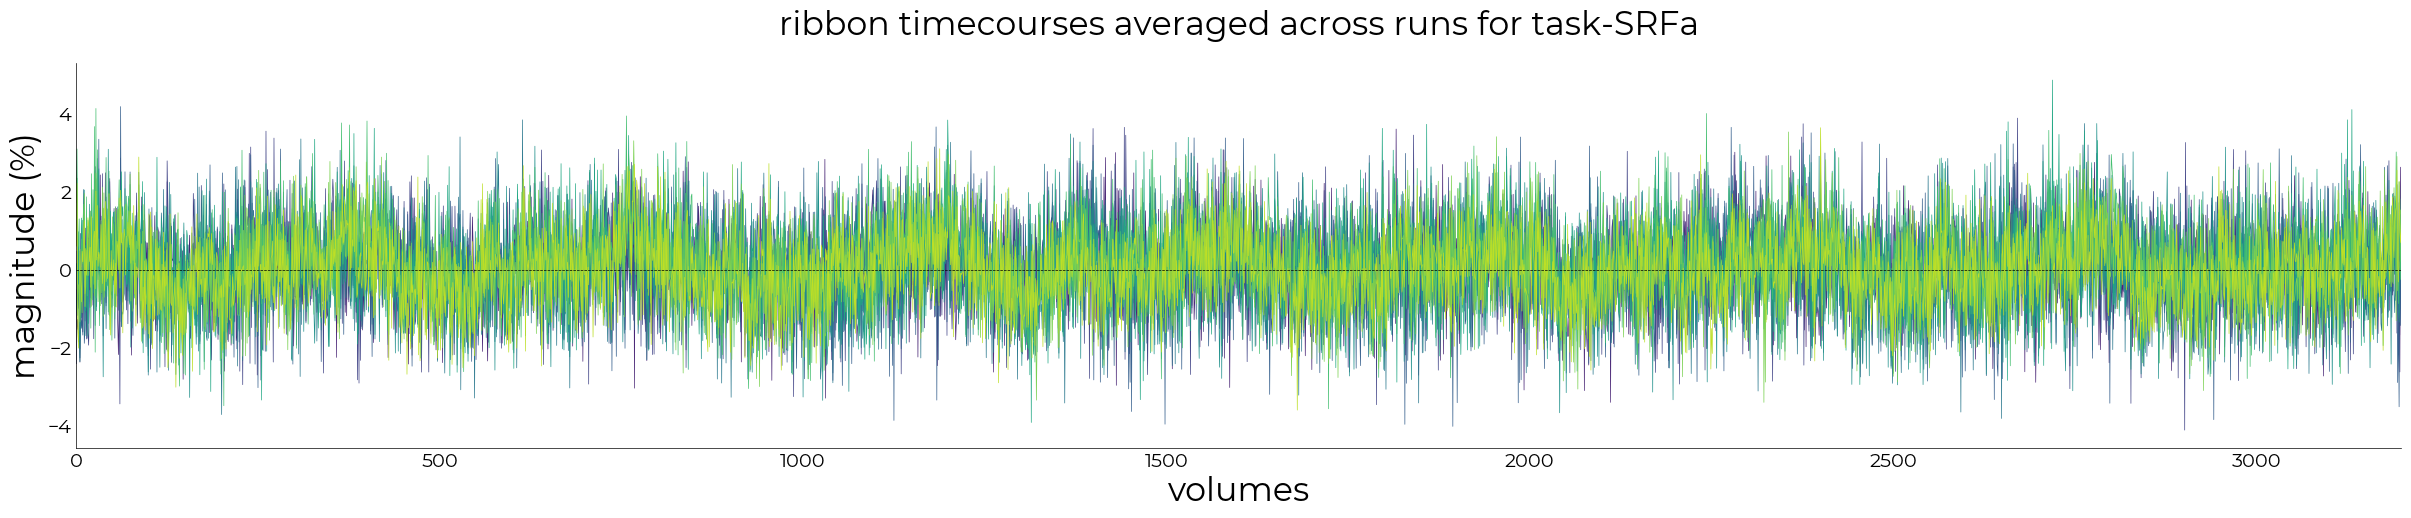

In [23]:
%matplotlib inline
# plot timecourses
task1_data = utils.select_from_df(df_ribbon, expression="task = SRFa")

plotting.LazyPlot(
    list(task1_data.T.to_numpy()),
    x_label="volumes",
    y_label="magnitude (%)",
    font_size=24,
    add_hline=0,
    line_width=0.5,
    title=f"ribbon timecourses averaged across runs for task-SRFa"
)

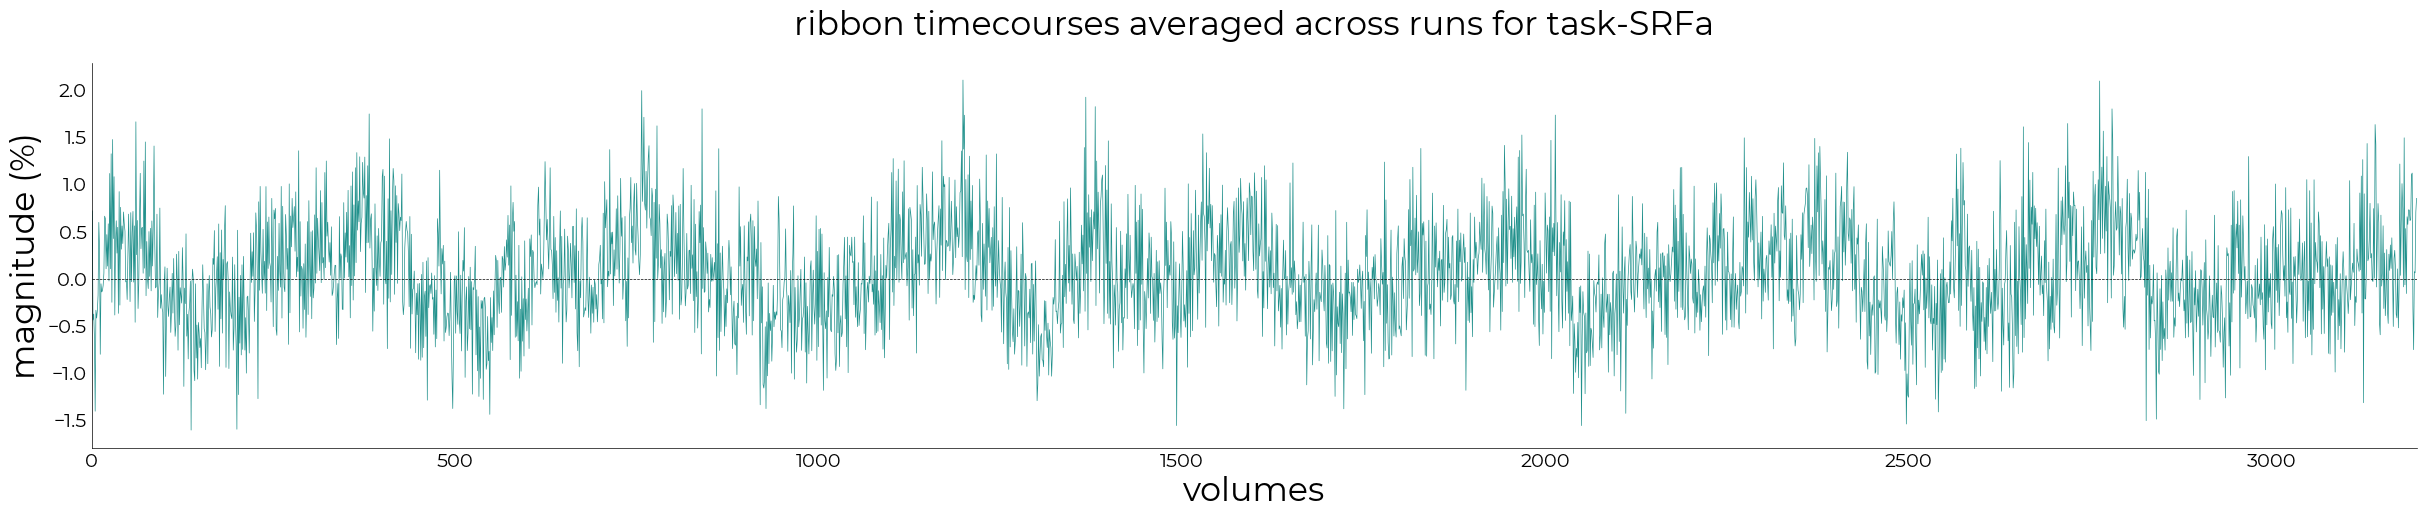

In [24]:
# select ribbon voxels
df_ribbon_avg = pd.DataFrame(df_ribbon.mean(axis=1), columns=["average"])
df_ribbon_avg

# plot timecourses
task1_avg = utils.select_from_df(df_ribbon_avg, expression="task = SRFa")

plotting.LazyPlot(
    list(task1_avg.T.to_numpy()),
    x_label="volumes",
    y_label="magnitude (%)",
    font_size=24,
    add_hline=0,
    line_width=0.5,
    title=f"ribbon timecourses averaged across runs for task-SRFa"
)

In [25]:
# switch our task-ID for run-IDs so we can flop everything in nideconv
renamed_func = []
renamed_onsets = []

task_onsets = utils.select_from_df(df_onsets, expression="event_type != response")
for ix,task in enumerate(["SRFa","SRFb"]):
    
    # sort out func
    df = utils.select_from_df(df_ribbon_avg, expression=f"task = {task}").reset_index()
    df["run"] = ix+1
    df = df.drop("task", axis=1)
    renamed_func.append(df)

    # sort out onsets
    df = utils.select_from_df(task_onsets, expression=(f"task = {task}","&","run = 1")).reset_index()
    df["run"] = ix+1
    df = df.drop("task", axis=1)
    renamed_onsets.append(df)

renamed_func = pd.concat(renamed_func).set_index(["subject","run","t"])
renamed_onsets = pd.concat(renamed_onsets).set_index(["subject","run","event_type"])
renamed_func

average
subject run t                
008     1   0.000    0.173719
            0.105    0.717697
            0.210   -0.438904
            0.315   -0.376302
            0.420   -0.627135
...                       ...
        2   335.475  0.589012
            335.580  0.110792
            335.685  0.838202
            335.790  0.955440
            335.895  0.644984

[6400 rows x 1 columns]

## t-stats from 3D-EPI

In [9]:
zstat1 = f"/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/freesurfer/{subject}/mri/{subject}_ses-2_task-SRF_space-fsnative_hemi-LR_run-1_desc-zstats1.npy"
zstat2 = f"/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/freesurfer/{subject}/mri/{subject}_ses-2_task-SRF_space-fsnative_hemi-LR_run-1_desc-zstats2.npy"

z1_data = np.load(zstat1)
z2_data = np.load(zstat2)

z1_pos = np.zeros_like(z1_data)
z1_pos[z1_data > 2.3] = z1_data[z1_data>2.3]

z2_neg = np.zeros_like(z2_data)
z2_neg_mask = np.zeros_like(z2_data)
z2_neg[z2_data<-2.3] = z2_data[z2_data<-2.3]
z2_neg_mask[z2_data<-2.3] = 1

z1_pos_v = pycortex.Vertex2D_fix(
    z1_pos,
    subject=subject,
    cmap="inferno",
    vmin1=2.3,
    vmax1=8
)

z2_neg_v = pycortex.Vertex2D_fix(
    z2_neg,
    subject=subject,
    data2=z2_neg_mask,
    cmap="cool",
    vmin1=-8,
    vmax1=-2.3
)

target = 11253
target_data = np.zeros_like(z1_data)
target_data[target] = 1
target_v = pycortex.Vertex2D_fix(target_data, subject=subject, cmap="magma")

In [50]:
prf_dir = f"/data1/projects/MicroFunc/Jurjen/projects/VE-SRF/derivatives/prf/{subject}/ses-1"
pyc = pycortex.SavePycortexViews(
    {
        "act": z1_pos_v,
        "neg": z2_neg_v,
        "target": target_v
    },
    subject=subject,
    radius=240,
    pivot=0,
    clicker="plot",
    transpose=True,
    prf_file=opj(prf_dir, f"{subject}_ses-1_task-2R_model-norm_stage-iter_desc-prf_params.pkl"),
    func_data=opj(prf_dir, f"{subject}_ses-1_task-2R_hemi-LR_desc-avg_bold.npy"),
    dm=opj(prf_dir, "design_task-2R.mat"),
    verbose=False)

<IPython.core.display.Javascript object>

Started server on port 1418


In [49]:
%matplotlib
pyc.fig

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>

## GLM

Defining HRF with option 'glover'
Creating stimulus vector(s)
Convolve stimulus vectors with HRF
Resample convolved stimulus vectors
Creating design matrix
Running fit
max tstat (vox 0) = -2.789767186407014
max beta (vox 0) = -0.06063476161931829


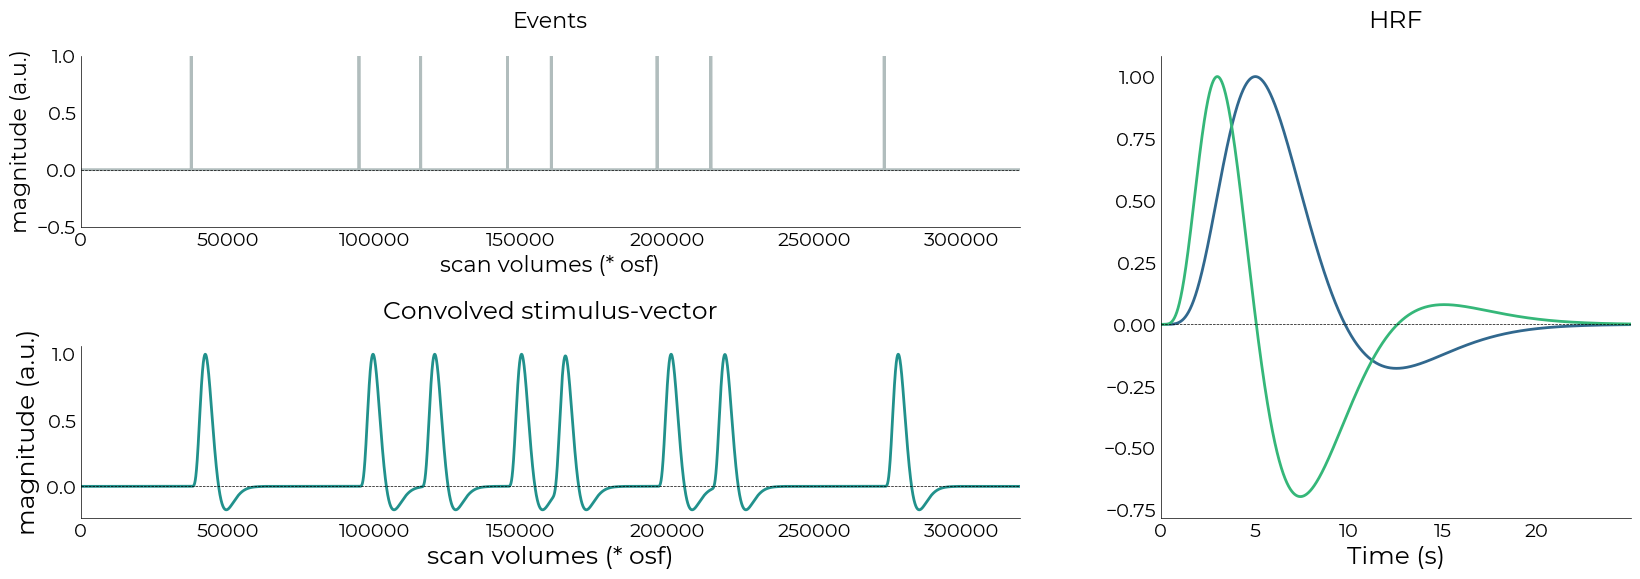

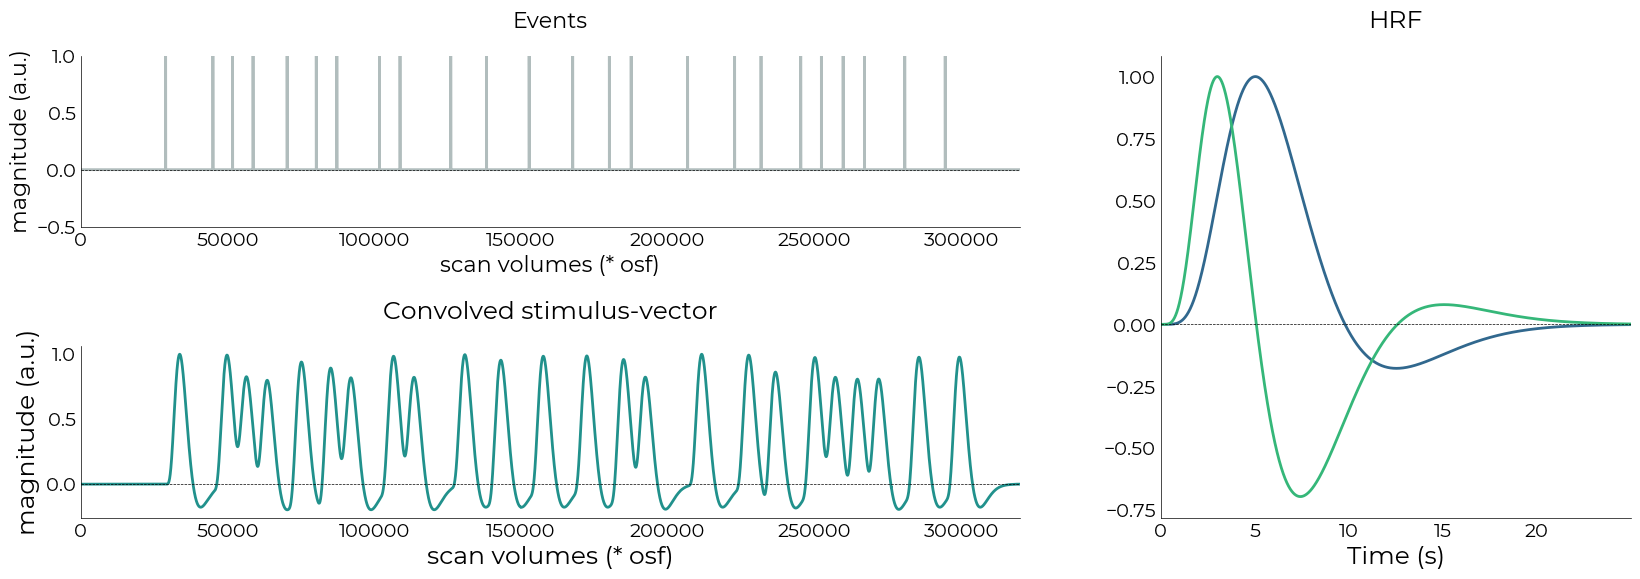

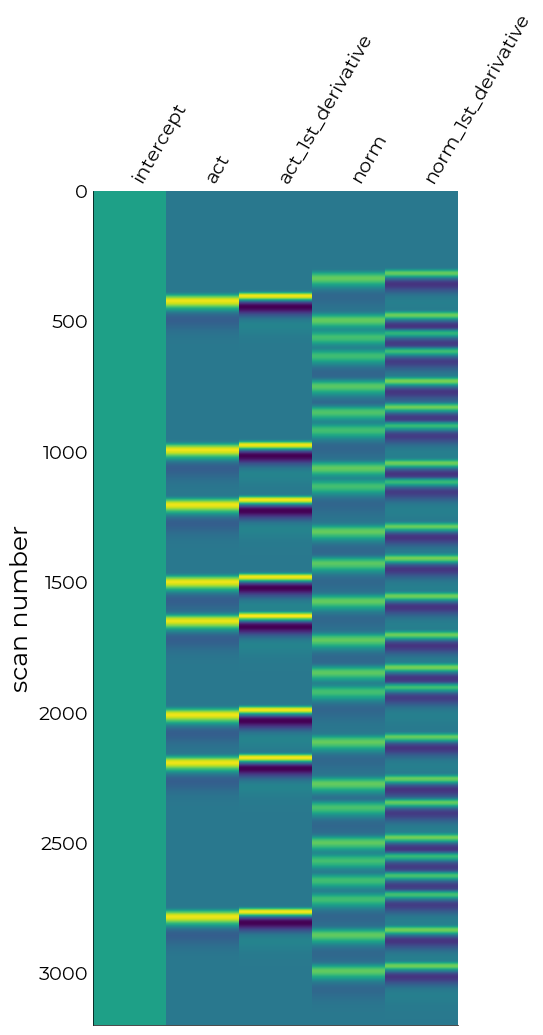

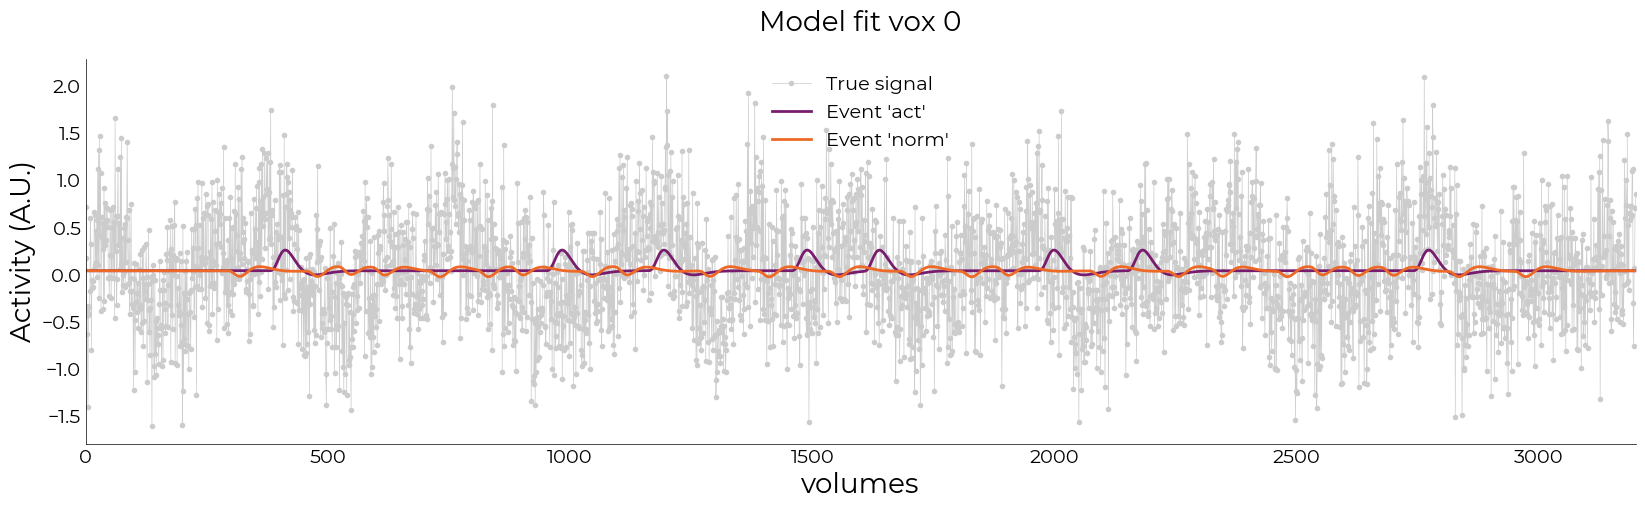

In [26]:
fitter = glm.GenericGLM(
    utils.select_from_df(renamed_onsets, expression="run = 1"), 
    utils.select_from_df(renamed_func, expression="run = 1"), 
    hrf_pars="glover",
    derivative=True,
    TR=0.105, 
    osf=100, 
    make_figure=True, 
    verbose=True,
    fit=True)


In [27]:
fitter.results["betas"]

array([[ 0.04044424],
       [ 0.16133353],
       [ 0.11247675],
       [ 0.00270683],
       [-0.06063476]])

## Deconvolve

In [28]:
# fit events on averaged data
can_fit = fitting.NideconvFitter(
    renamed_func,
    renamed_onsets,
    basis_sets='canonical_hrf_with_time_derivative',
    # n_regressors=4,
    TR=0.105,
    interval=[-3,25],
    add_intercept=True,
    verbose=True,
    fit=True)

# fit events on averaged data
fou_fit = fitting.NideconvFitter(
    renamed_func,
    renamed_onsets,
    basis_sets='fourier',
    n_regressors=2,
    TR=0.105,
    interval=[-3,25],
    add_intercept=True,
    verbose=True,
    fit=True)


Selected 'canonical_hrf_with_time_derivative'-basis sets
Adding event 'act' to model
Adding event 'norm' to model
Fitting with 'ols' minimization
Done
Selected 'fourier'-basis sets
Adding event 'act' to model
Adding event 'norm' to model
Fitting with 'ols' minimization
Done


In [29]:
# # fit button response on single run data
# response_onsets = utils.select_from_df(df_onsets, expression="event_type = response")
# fit_button = fitting.NideconvFitter(
#     df_func,
#     response_onsets,
#     basis_sets='fourier',
#     n_regressors=9,
#     TR=0.105,
#     interval=[-3,17],
#     add_intercept=True,
#     verbose=True,
#     fit=True)

# fit_button.timecourses_condition()

## Plotting

### Average over ribbon voxels

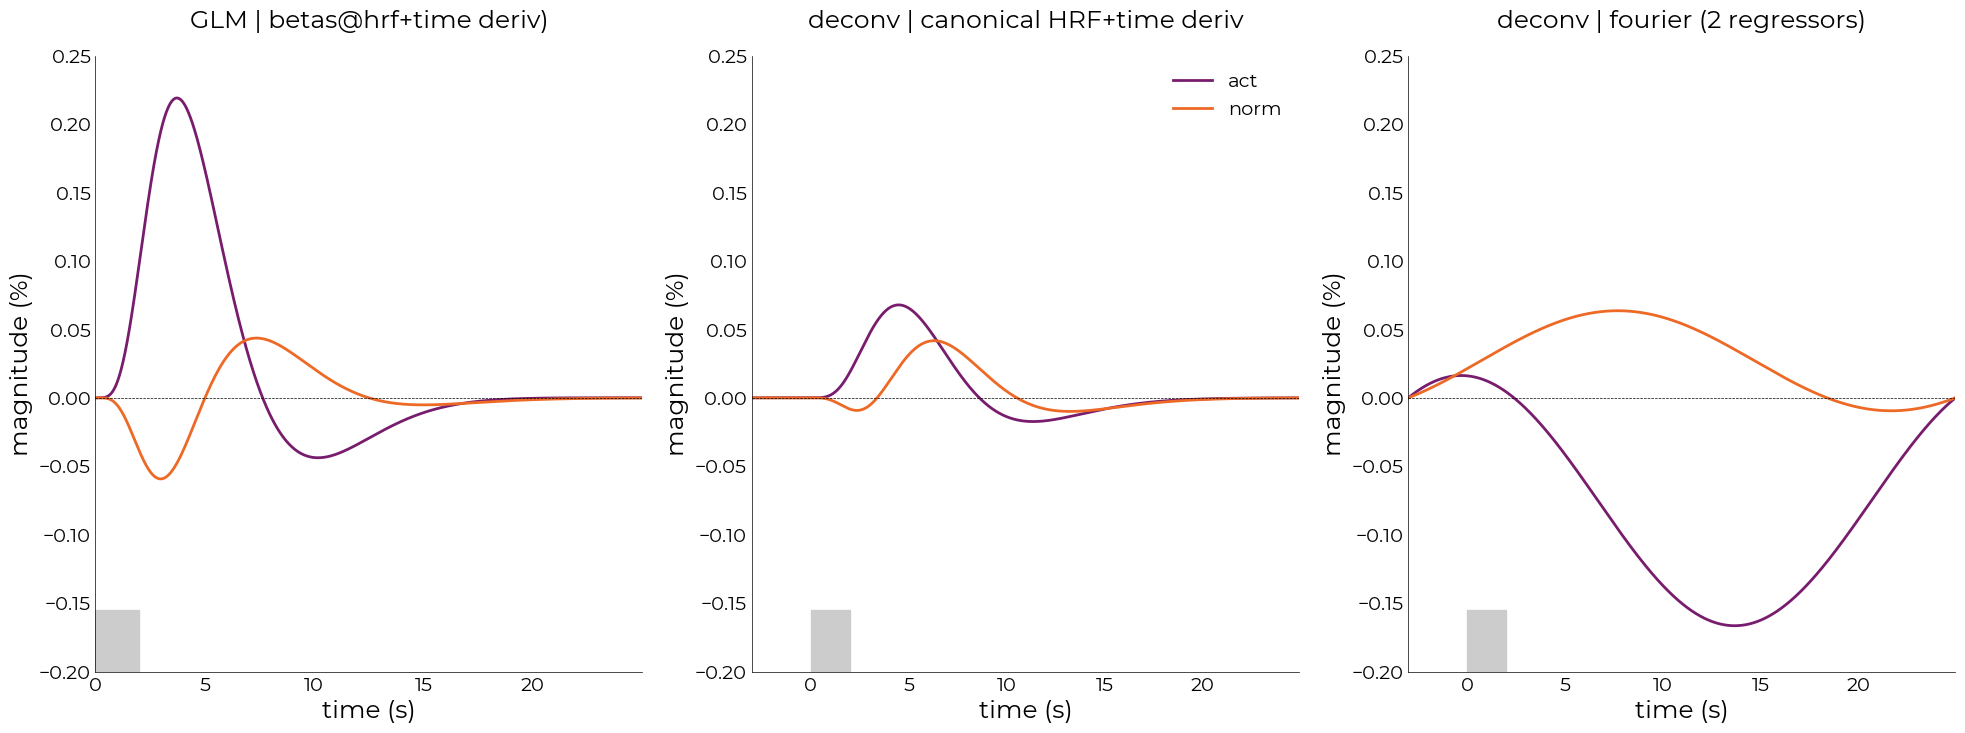

index 2456: [ 1.89222447 -1.99401648  0.85519715  1.30060897  0.          0.32818118
  4.99707334  1.60020773  9.95479949  0.25038806]


In [30]:
%matplotlib inline
fig,axs = plt.subplots(ncols=3, figsize=(24,8))

hrf_act = np.squeeze(np.array(fitter.hrf).T @ fitter.results["betas"][1:3])
hrf_norm = np.squeeze(np.array(fitter.hrf).T @ fitter.results["betas"][3:])

time_axis = list(((np.arange(0,hrf_act.shape[0]))/fitter.osf)*fitter.TR)
y_lim = [-0.2,0.25]
plotting.LazyPlot(
    [hrf_act,hrf_norm],
    xx=time_axis,
    x_label="time (s)",
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs[0],
    title="GLM | betas@hrf+time deriv)",
    line_width=2,
    cmap='inferno',
    y_lim=y_lim)

can_fit.plot_average_per_event(
    x_label="time (s)",
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs[1],
    title="deconv | canonical HRF+time deriv",
    labels=can_fit.cond,
    line_width=2,
    cmap='inferno',
    y_lim=y_lim)

fou_fit.plot_average_per_event(
    x_label="time (s)",
    y_label="magnitude (%)",
    add_hline='default',
    axs=axs[2],
    title=f"deconv | fourier ({fou_fit.n_regressors} regressors)",
    line_width=2,
    cmap='inferno',
    y_lim=y_lim)

# plot stimulus onset
for ax in axs:
    ax.axvspan(0,2, ymax=0.1, color="#cccccc")

In [40]:
can_fit.model.get_rsq()

average
subject run          
008     1    0.014432
        2    0.004264

In [41]:
fou_fit.model.get_rsq()

average
subject run          
008     1    0.041859
        2    0.018112

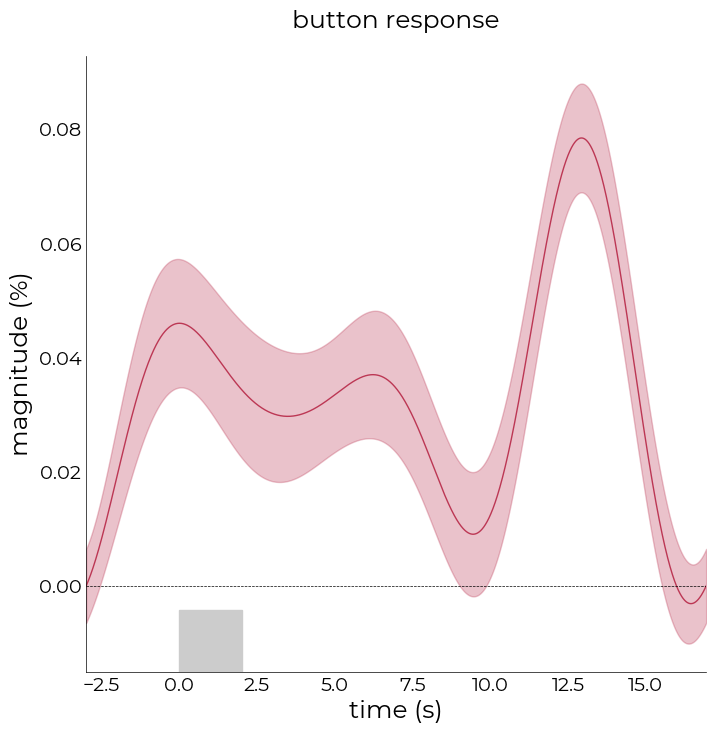

In [170]:
# %matplotlib inline
# fig,axs = plt.subplots(figsize=(8,8))
# fit_button.plot_average_per_event(
#     x_label="time (s)",
#     y_label="magnitude (%)",
#     add_hline='default',
#     axs=axs,
#     title="button response",
#     add_labels=True,
#     fancy=True,
#     fancy_denom=6,
#     inset_ttp=[0.75, 0.8, 0.3],
#     cmap='inferno')

# # plot stimulus onset
# axs.axvspan(0,2, ymax=0.1, color="#cccccc")

### Split events over voxels

In [157]:
df_ribbon.shape

(6400, 6)

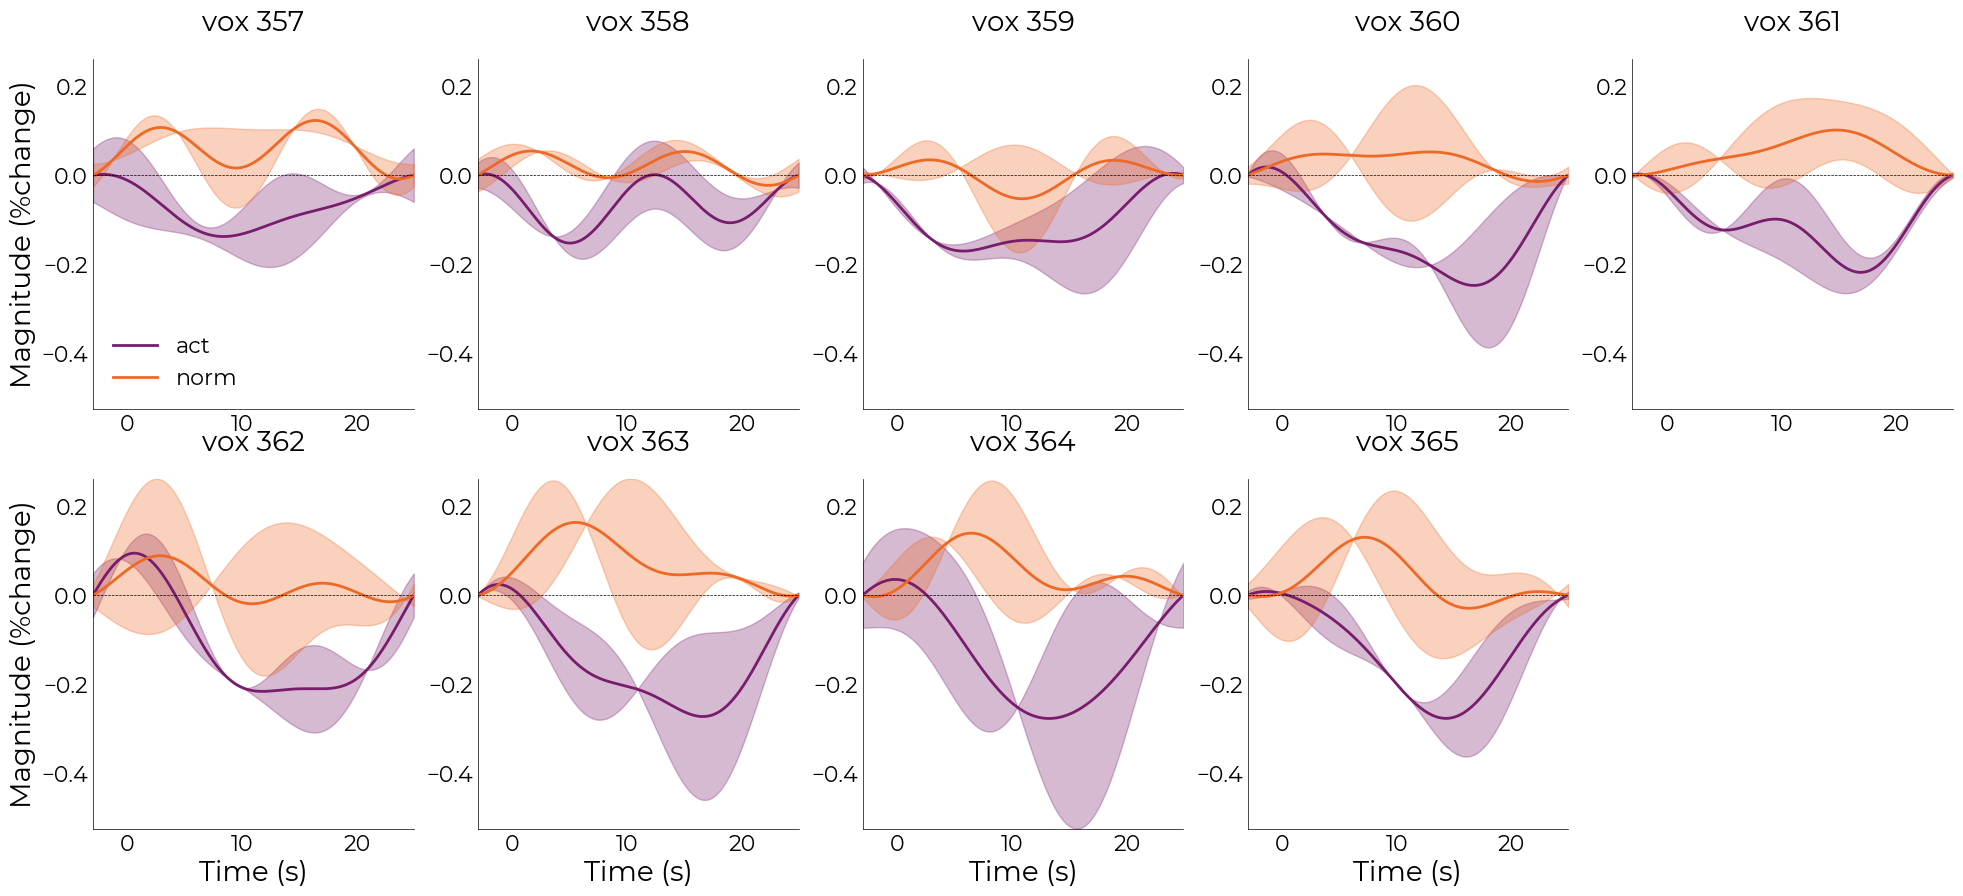

In [39]:
fou_fit.plot_average_per_voxel(
    labels=nd_fit.cond,
    wspace=0.2,
    # n_cols=df_ribbon.shape[-1],
    n_cols=5,
    cmap="inferno",
    line_width=2,
    font_size=20,
    label_size=16,
    sharey=True)
    # save_as=opj(func_dir, "hrf_gamma_voxel.png"))